In [1]:
import easyocr
import os
import torch
import matplotlib.pyplot as plt
import random

In [2]:
#!pip install matplotlib

In [3]:
path = os.path.join(os.getcwd(),'my_model','new_model')
torch.cuda.is_available()

True

In [4]:
reader = easyocr.Reader(lang_list = ['en','th'],
                        model_storage_directory = os.path.join('my_model','model'),
                        user_network_directory = os.path.join('my_model','user_network'),
                        recog_network  ='trdg',
                        gpu = True )
# reader = easyocr.Reader(lang_list = ['en','th'],gpu = False )
                        

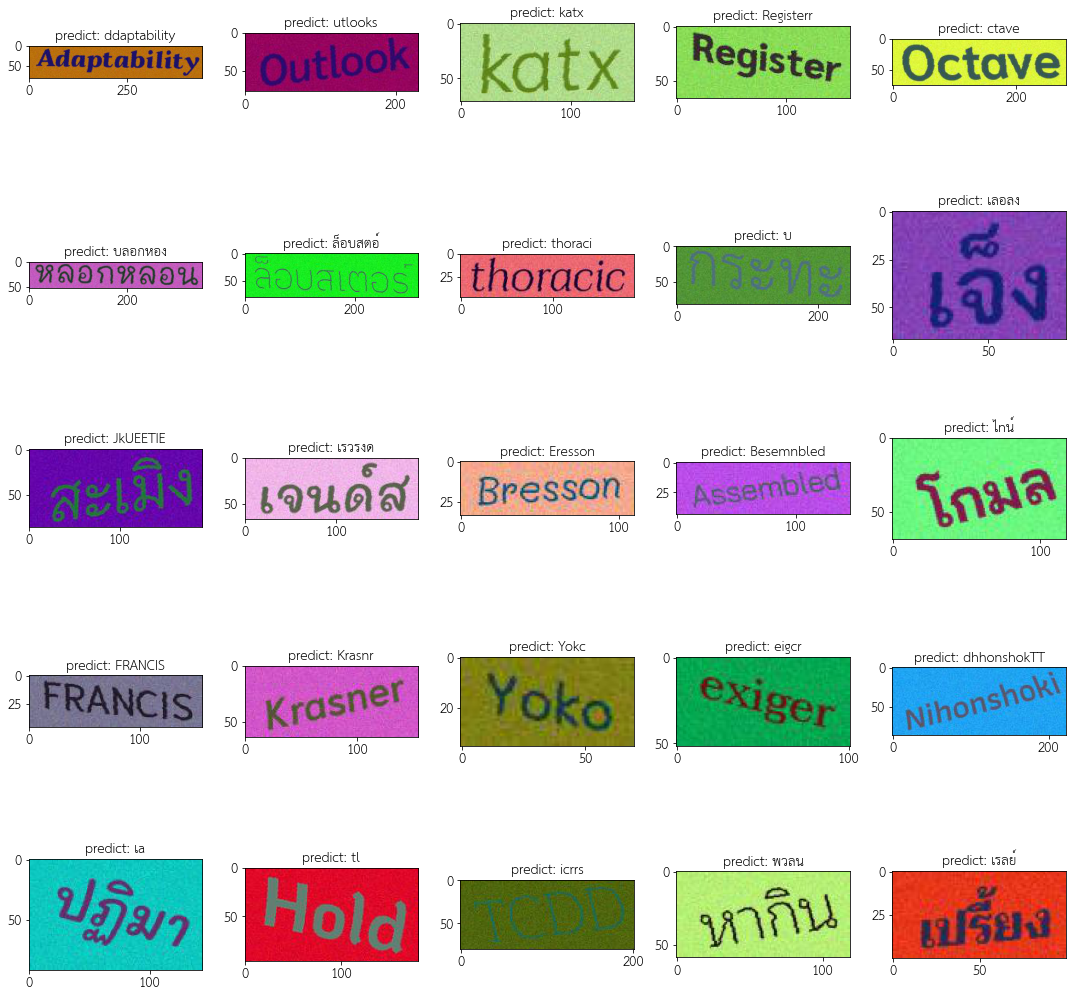

In [5]:
plt.rcParams['font.family'] = 'TH Sarabun New'
plt.rcParams['xtick.labelsize'] = 20.0
plt.rcParams['ytick.labelsize'] = 20.0
columns = 5
rows = 5
fig = plt.figure(figsize=(15, 15))
ax = []
for i in range(columns*rows):
    # random_file_name = random.sample(os.listdir(os.path.join('trainer/all_data/testing/testing')),1)[0]
    # random_file_path = os.path.join('trainer/all_data/testing/testing',random_file_name)
    random_file_name = random.sample(os.listdir(os.path.join('trainer/all_data/training/training')),1)[0]
    random_file_path = os.path.join('trainer/all_data/training/training',random_file_name)
    img = plt.imread(random_file_path)
    result = reader.readtext(random_file_path) 
    ax.append(fig.add_subplot(rows, columns, i+1) )
    try:
        ax[-1].set_title(f'predict: {result[0][1]}',fontsize=20)
    except:
        ax[-1].set_title('No result',fontsize=20)
    plt.imshow(img)
fig.tight_layout() 
plt.show()